In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[14] # 500,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 60 milliseconds
threshold used Qiucksort: elapsed time: 65 milliseconds
Qiucksort: elapsed time: 66 milliseconds
threshold used Qiucksort: elapsed time: 62 milliseconds
Qiucksort: elapsed time: 369 milliseconds
threshold used Qiucksort: elapsed time: 88 milliseconds
Qiucksort: elapsed time: 71 milliseconds
threshold used Qiucksort: elapsed time: 59 milliseconds
Qiucksort: elapsed time: 58 milliseconds
threshold used Qiucksort: elapsed time: 73 milliseconds
Qiucksort: elapsed time: 65 milliseconds
threshold used Qiucksort: elapsed time: 61 milliseconds
Qiucksort: elapsed time: 57 milliseconds
threshold used Qiucksort: elapsed time: 59 milliseconds
Qiucksort: elapsed time: 73 milliseconds
threshold used Qiucksort: elapsed time: 78 milliseconds
Qiucksort: elapsed time: 61 milliseconds
threshold used Qiucksort: elapsed time: 61 milliseconds
Qiucksort: elapsed time: 63 milliseconds
threshold used Qiucksort: elapsed time: 75 milliseconds
Qiucksort: elapsed time: 63 m

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 347, 1: 334, 2: 312, 3: 326, 4: 322, 5: 312, 6: 304, 7: 312, 8: 315, 9: 336, 10: 293, 11: 306, 12: 321, 13: 299, 14: 309, 15: 316, 16: 293, 17: 297, 18: 319, 19: 298, 20: 295, 21: 314, 22: 304, 23: 309, 24: 307, 25: 300, 26: 302, 27: 300, 28: 297, 29: 308, 30: 308, 31: 293, 32: 291, 33: 308, 34: 302, 35: 294, 36: 292, 37: 313, 38: 297, 39: 302, 40: 316, 41: 310, 42: 318, 43: 320, 44: 315, 45: 313, 46: 305, 47: 305, 48: 313, 49: 306, 50: 295, 51: 319, 52: 298, 53: 306, 54: 309, 55: 322, 56: 305, 57: 317, 58: 317, 59: 317, 60: 326, 61: 317, 62: 296, 63: 315, 64: 305, 65: 307, 66: 309, 67: 305, 68: 311, 69: 304, 70: 305, 71: 308, 72: 316, 73: 304, 74: 304, 75: 301, 76: 311, 77: 309, 78: 313, 79: 336, 80: 313, 81: 300, 82: 314, 83: 318, 84: 408, 85: 336, 86: 332, 87: 335, 88: 309, 89: 327, 90: 331, 91: 308, 92: 321, 93: 319, 94: 317, 95: 318, 96: 316, 97: 324, 98: 316, 99: 341, 100: 772, 101: 350, 102: 340, 103: 326, 104: 340, 105: 326, 106: 337, 107: 368, 10

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [69.4, 66.8, 62.4, 65.2, 64.4, 62.4, 60.8, 62.4, 63.0, 67.2, 58.6, 61.2, 64.2, 59.8, 61.8, 63.2, 58.6, 59.4, 63.8, 59.6, 59.0, 62.8, 60.8, 61.8, 61.4, 60.0, 60.4, 60.0, 59.4, 61.6, 61.6, 58.6, 58.2, 61.6, 60.4, 58.8, 58.4, 62.6, 59.4, 60.4, 63.2, 62.0, 63.6, 64.0, 63.0, 62.6, 61.0, 61.0, 62.6, 61.2, 59.0, 63.8, 59.6, 61.2, 61.8, 64.4, 61.0, 63.4, 63.4, 63.4, 65.2, 63.4, 59.2, 63.0, 61.0, 61.4, 61.8, 61.0, 62.2, 60.8, 61.0, 61.6, 63.2, 60.8, 60.8, 60.2, 62.2, 61.8, 62.6, 67.2, 62.6, 60.0, 62.8, 63.6, 81.6, 67.2, 66.4, 67.0, 61.8, 65.4, 66.2, 61.6, 64.2, 63.8, 63.4, 63.6, 63.2, 64.8, 63.2, 68.2, 154.4, 70.0, 68.0, 65.2, 68.0, 65.2, 67.4, 73.6, 67.4, 70.4, 66.8, 66.4, 77.6, 64.6, 72.6, 68.2, 66.0, 68.0, 67.6, 70.2, 69.6, 73.4, 71.0, 68.0, 69.6, 73.6, 69.0, 71.8, 69.4, 71.8, 71.6, 70.8, 73.6, 70.2, 143.0, 75.4, 69.4, 77.0, 74.2, 72.6, 92.6, 71.0, 73.4, 75.8, 72.2, 73.6, 77.4, 74.6, 70.0, 72.8, 74.4, 73.2, 72.8, 70.8, 76.0, 71.2, 75.0, 75.4, 70.2, 75.4, 74.8, 71

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50577/956723941.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


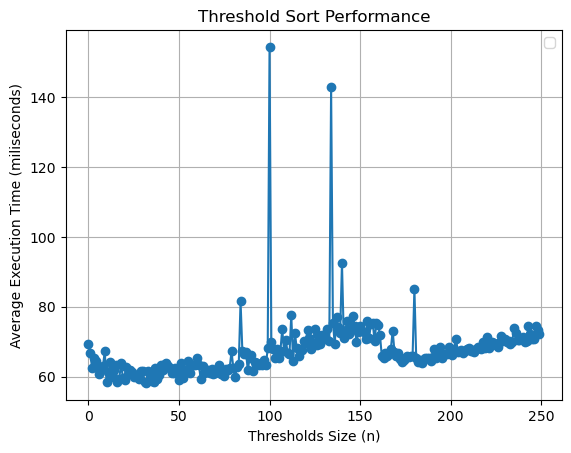

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 500,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50577/497607947.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


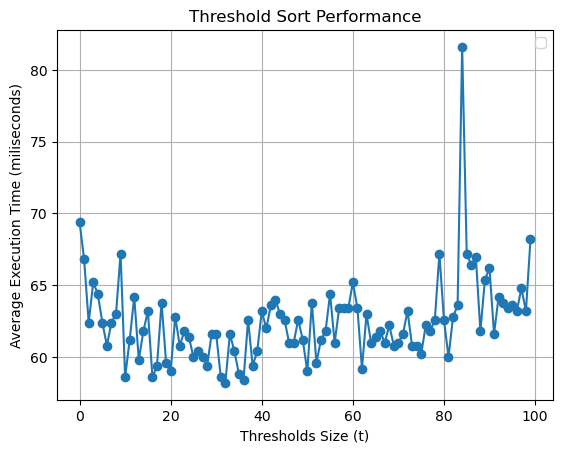

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 500,000, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()